# Recommender Systems

In this discussion, we introduce some basics of recommender systems (which is also covered in the lectures) in the context of movie recommendation.

## Two Types of Recommender Systems

1. Content based recommendation
2. Collaborative filtering

## Content based recommendation
<!-- Recommend items to customer x simialr to previous items rated highly by x. <- this sounds like item-item collaborative filtering -->

If we know the features of items, we can exploit that information to learn the preference of users, and further infer how would a user rate an un-rated item.

For example, if a user who has watched a lot of sci-fi movies and series as well as western ones, HBO is likely to recommend *Westworld* to the user.

ref : https://www.youtube.com/watch?v=2uxXPzm-7FY

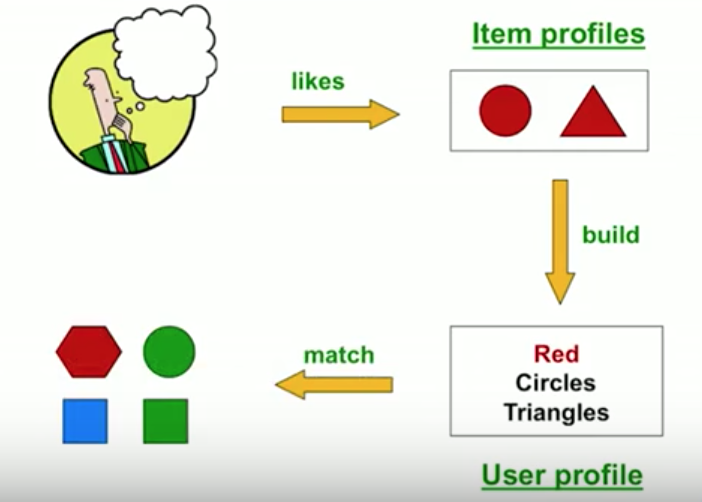
<!-- ![pipeline](pipeline.jpg) -->

<br /><br /><br />

Following the notations in the project statement. There are $m$ users and $n$ movies. $r_{ij}$ is the rate from user $i$ to movie $j$. We also use a matrix $\mathbf{W}$ to denote whether a rate entry is known:

$$W_{ij} = \begin{cases}1,& \text{if }r_{ij}\text{ is known}\\0,& \text{if }r_{ij}\text{ is unknown}\end{cases}$$

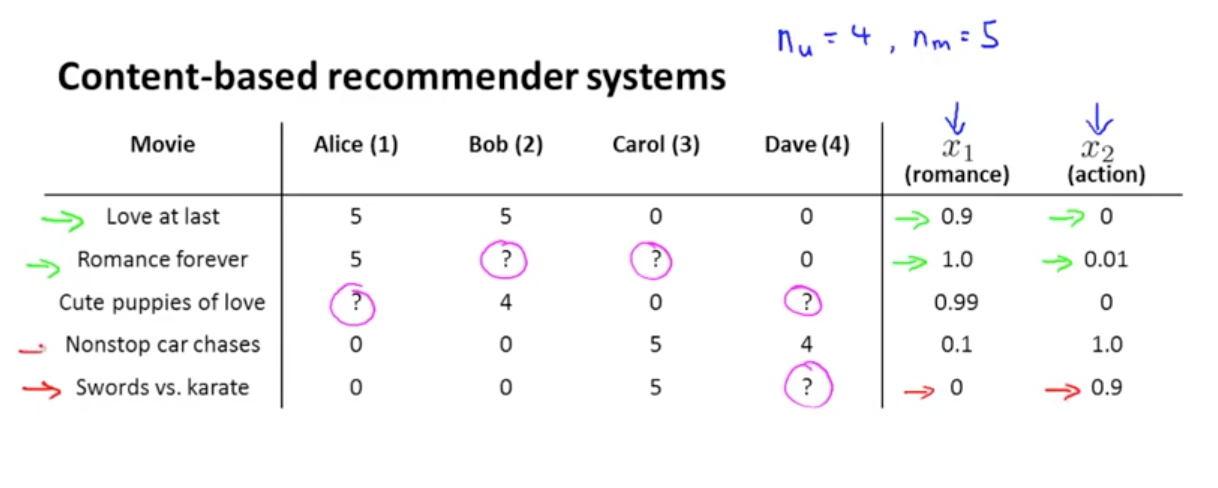
<!-- ![content_based_recommender](content_based_recommender.jpg) -->

Credit: Coursera Course: Machine Learning provided by Andrew Ng
https://www.youtube.com/watch?v=giIXNoiqO_U

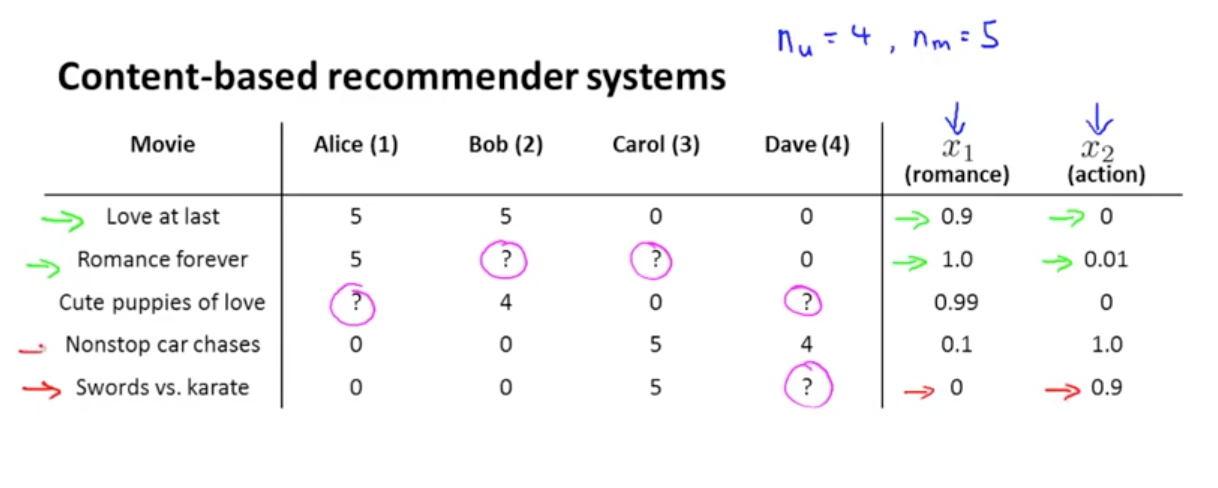
<!-- ![content_based_recommender](content_based_recommender.jpg) -->
A simple thought would be using linear regression to learn the user preferences:

$$\hat{r}_{ij} = \mathbf{\theta}_i^T \mathbf{x}_j + b_i$$

Here, $\mathbf{\theta}_i \in \mathbb{R}^K$ is the preference of the $i$th user.

If we let $\widetilde{\mathbf{\theta}}_i = [b_i, \mathbf{\theta}_i]^T \in \mathbb{R}^{K+1}$, $\widetilde{\mathbf{x}}_j = [1, \mathbf{x}_j]^T \in \mathbb{R}^{K+1}$, then the equation becomes
$$\hat{r}_{ij} = \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j$$

Now to learn the preferences - $\widetilde{\mathbf{\theta}}_i$'s, we can optimize the following problem:
$$\mathop{\rm minimize}_\limits{\widetilde{\mathbf{\theta}}_1,\dots,\widetilde{\mathbf{\theta}}_m} \sum_{i,j: W_{ij}=1} \lVert r_{ij} - \hat{r}_{ij}\rVert^2 = \sum_{i,j: W_{ij}=1} (r_{ij} - \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j)^2$$

$$\mathop{\rm minimize}_\limits{\widetilde{\mathbf{\theta}}_1,\dots,\widetilde{\mathbf{\theta}}_m} \sum_{i,j: W_{ij}=1} \lVert r_{ij} - \hat{r}_{ij}\rVert^2 = \sum_{i,j: W_{ij}=1} (r_{ij} - \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j)^2$$
We can also add regularization terms:
$$\mathop{\rm minimize}_\limits{\widetilde{\mathbf{\theta}}_1,\dots,\widetilde{\mathbf{\theta}}_m} \sum_{i,j: W_{ij}=1} \lVert r_{ij} - \hat{r}_{ij}\rVert^2 + \lambda \sum_{i=1}^m \lVert\widetilde{\mathbf{\theta}}_i\rVert^2= \sum_{i,j: W_{ij}=1} (r_{ij} - \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j)^2 + \lambda \sum_{i=1}^m\sum_{j=1}^{K+1}\widetilde{\theta}_{ij}^2$$

X:
[[1.  0.9]
 [1.  1. ]]


/Users/Alex/anaconda/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


(0, 3)

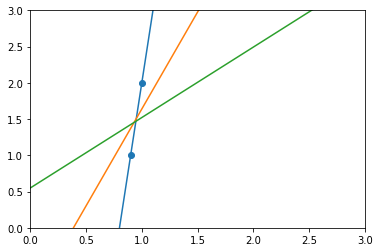

In [26]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Two data points: [x = 0.9, y = 1], [x = 1, y = 2]
x = np.array([0.9, 1])
y = np.array([1, 2])

X = np.hstack([np.ones((2,1)), x[:, np.newaxis]])
print(f'X:\n{X}')

# Linear regression: y = x * b + c = X * theta

theta, _, _, _ = np.linalg.lstsq(X, y)

l1 = 0.01 # lambda
l2 = 0.1
theta_l1 = np.linalg.pinv(X.T.dot(X)+l1*np.identity(2)).dot(X.T).dot(y)
theta_l2 = np.linalg.pinv(X.T.dot(X)+l2*np.identity(2)).dot(X.T).dot(y)

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x, y)
xx = np.linspace(0,3,100)
XX = np.pad(xx.reshape(-1,1), ((0,0),(1,0)), 'constant', constant_values=1)
ax.plot(xx, XX.dot(theta))
ax.plot(xx, XX.dot(theta_l1))
ax.plot(xx, XX.dot(theta_l2))
ax.set_xlim([0,3])
ax.set_ylim([0,3])

## Collaborative filtering

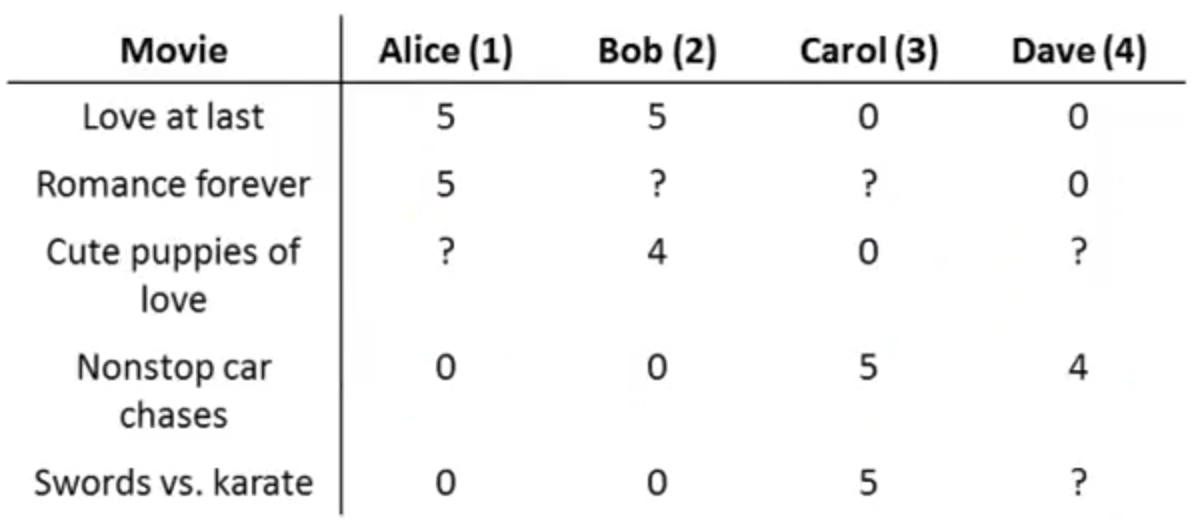
<!-- ![collaborative_filtering](collaborative_filtering.png) -->

However, extracting (good) features can be hard.

Collaborative filtering uses the similarity between users/items to make recommendations.

The intuition is that, for example, one of your friends likes the movies you like, and also gives low ratings to the movies that you dislike. Now one day your friend watches a new movie (which you haven't watched), and your friend really likes it, it is very likely that you will like it too. This is called **user-user collaborative filtering**.

## Collaborative filtering

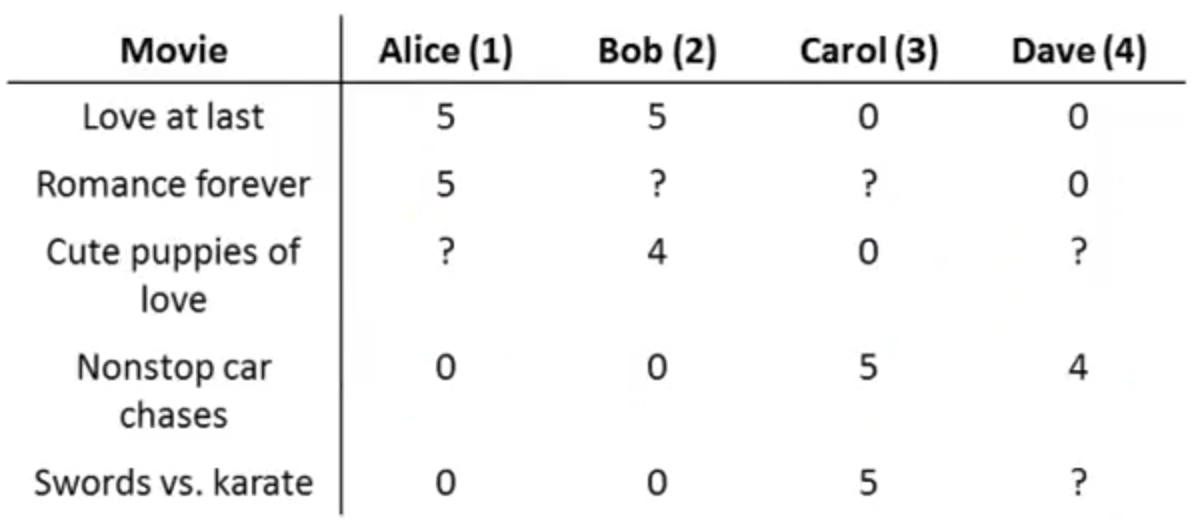
<!-- ![collaborative_filtering](collaborative_filtering.png) -->

For another example, two movies are often simultaneously rated high/low (a naïve example would be sequals). Then when you rate one of them high, you'll probably like the other one as well. This is called **item-item collaborative filtering**.

### Define similarity

1. Jaccard similarity (commonly used for sets)
2. Cosine similarity
  $$\mathop{\rm CosSim}(\mathbf{x}, \mathbf{y})=\frac{<\mathbf{x}, \mathbf{y}>}{\lVert\mathbf{x}\rVert \cdot \lVert\mathbf{y}\rVert}$$
  Problem: not invariant to shifts. $\mathop{\rm CosSim}(\mathbf{x}, \mathbf{y}) \neq \mathop{\rm CosSim}(\mathbf{x}+\mathbf{1}, \mathbf{y})$
3. Centered cosine (Pearson-correlation coecient)
  $$\mathop{\rm Pearson}(\mathbf{x}, \mathbf{y})=\frac{<\mathbf{x}-\bar{\mathbf{x}}, \mathbf{y}-\bar{\mathbf{y}}>}{\lVert\mathbf{x}-\bar{\mathbf{x}}\rVert \cdot \lVert\mathbf{y}-\bar{\mathbf{y}}\rVert}$$

ref: https://zh.coursera.org/learn/machine-learning/lecture/2WoBV/collaborative-filtering

### User-user collaborative filtering

Now that we can find the similar users, how do we predict the ratings?

#### k-Nearest Neighbor (KNN)

To predict $r_{ij}$, find the top $k$ similar users of user $i$ who have rated the movie $j$ (let this set of $k$ users be $P_i$), and use the average of their ratings. That is

$$\hat{r}_{ij} = \frac{\sum_{v \in P_i} r_{vj}}{k}$$

Considering that each user may have their own baseline of ratings, we may modify this to

$$\hat{r}_{ij} - \mu_i = \frac{\sum_{v \in P_i} r_{vj} - \mu_v}{k}$$

Further, if we give more weights to more similar users, the equation turns into
$$\hat{r}_{ij} - \mu_i = \frac{\sum_{v \in P_i} \mathrm{sim}_{iv}(r_{vj} - \mu_v)}{\sum_{v \in P_i} \mathrm{sim}_{iv}}$$
This is the equation you are asked to use in Project 3.

### Challenges

- Sparsity: Sparse rating matrices limits the coverage of neighborhood-based methods. It creates challenges for robust similarity computation when the number of mutually rated items between two users is small
- Scalability: Online phase of neighborhood-based methods can sometimes be impractical in large-scale settings.

### Matrix Factorization

Recall what we had in content-based recommender systems:
$$\mathop{\rm minimize}_\limits{\widetilde{\mathbf{\theta}}_1,\dots,\widetilde{\mathbf{\theta}}_m} \sum_{i,j: W_{ij}=1} (r_{ij} - \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j)^2 + \lambda \sum_{i=1}^m\sum_{j=1}^{K+1}\widetilde{\theta}_{ij}^2$$

What if we have access to the user preferences but not movie features?

$$\mathop{\rm minimize}_\limits{\widetilde{\mathbf{x}}_1,\dots,\widetilde{\mathbf{x}}_m} \sum_{i,j: W_{ij}=1} (r_{ij} - \widetilde{\mathbf{\theta}}_i^T \widetilde{\mathbf{x}}_j)^2 + \lambda \sum_{i=1}^n\sum_{j=1}^{K+1}\widetilde{x}_{ij}^2$$

So we can not only learn the preferences in this way; we can also learn features!

### Matrix Factorization

By alternatively optimizing $\sum_{i,j: W_{ij}=1} \lVert r_{ij} - \hat{r}_{ij}\rVert^2$ (with regularization terms) over $\widetilde{\mathbf{x}}_i$'s and $\widetilde{\mathbf{\theta}}_i$'s, we can actually learn both user preferences and item features.

Actually, we can combine the two optimization problems together, and get

$$\mathop{\rm minimize}_{\substack{\mathbf{\theta}_1,\dots,\mathbf{\theta}_m \\ \mathbf{x}_1,\dots,\mathbf{x}_n}} \sum_{i,j: W_{ij}=1} (r_{ij} - \mathbf{\theta}_i^T \mathbf{x}_j)^2 + \lambda_{\mathbf{x}} \sum_{i=1}^n \lVert x_{i}\rVert^2 + \lambda_{\theta} \sum_{i=1}^m\lVert\theta_{i}\rVert^2$$

This can be rewritten to a weighted matrix factorization problem:

$$\mathop{\rm minimize}_{\mathbf{X},\mathbf{\Theta}} \sum_{i,j} W_{ij}(r_{ij} - (\mathbf{\Theta} \mathbf{X})_{ij})^2 + \lambda_{\mathbf{x}} \lVert \mathbf{X}\rVert_F^2 + \lambda_{\theta} \lVert \mathbf{\Theta}\rVert_F^2$$

$$\mathbf{\Theta} = \begin{bmatrix}\mathbf{\theta}_1^T \\ \vdots \\ \mathbf{\theta}_m^T\end{bmatrix}, \qquad
\mathbf{X} = \begin{bmatrix}\mathbf{x}_1, \dots, \mathbf{x}_n\end{bmatrix}$$

$\mathbf{\Theta} \mathbf{X}$ is an $m \times n$ matrix, giving prediction for all possible pairs of user $i$ and movie $j$. Therefore based on $\mathbf{\Theta} \mathbf{X}$ we can make reasonble recommendations.